# NLP With Hotel Review Part 2  
  
Daniel Mortensen  
7-Sep-2021  

## Introduction

Hotel review data has been prepped by the data engineering team. Here, the data will be fit using several predictive models. The best of these models will be optimized for hyperparameters. 

*Task Summary*  
1. Model the data using Logistic regression*:
    - Determine the 20 most significant words for both positive and negative reviews
    - Determine the relationship between the number of dimensions and the run-time for logistic regression.
2. Model the data using a *K-Nearest Neighbor classifier*:
    - Determine the relationship between the number of nearest neighbors and run-time.
    - Determine the optimal number of neighbors for the classifier.
3. Model the data using a *Decision Tree classifier*:
    - Determine the optimal maximum depth for the classifier.
    - Discuss pros and cons of decision tree classifiers.
4. Discuss the purpose of `Validation sets`
5. Optimize the best model using 5-fold cross validation.
6. Create a new feature and determine if the feature improves model accuracy.

*Results Summary*  
  
The hotel review data was modeled using (1) logistic regression, (2) a K-Nearest Neighbor classifier, and (3) a Decision Tree classifier. The best results were obtained with the logistic regression model (accuracy ~71.8%). With dimension reduction, this accuracy was increased to ~76.8%. This model was optimized in terms of hyperparameters and the months were modeled as a circle, resulting in a final model with an accuracy of 76.4%. This final model is more likely to result in a similar accuracy score for other unknown data.

## Methods

Data were taken from the provided test_dataframe.csv and train_dataframe.csv files. All data were analyzed in this Jupyter Notebook, which is running on a Python 3 kernel. 

The following libraries and tools were imported for analysis and visualization:

In [1]:
# Importing libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

The test_dataframe.csv file was imported as "test_df" and the train_dataframe.csv file was imported as train_df.

In [2]:
# import the data from the csv files
test_df = pd.read_csv('./test_dataframe.csv')
train_df = pd.read_csv('./train_dataframe.csv')

# confirm the data imported properly
display(test_df.head(), train_df.head())

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_n_worry,n_n_worth,n_n_would,n_n_write,n_n_wrong,n_n_year,n_n_yes,n_n_yet,n_n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


The data are now segmented into independent (X) and dependent (y)  data frames. Since the `rating` column is the column of interest, this column is set as the y values.

In [3]:
# Independent columns include all columns except the rating column.
# So, the independent variables will include all BUT the rating column.
X_train = train_df.drop(columns='rating').copy()
X_test = test_df.drop(columns='rating').copy()

# The only dependent column is the rating column.
# So, the dependent variable will include ONLY this column.
y_train = train_df['rating'].copy()
y_test = test_df['rating'].copy()

# confirm the data was segmented properly
display(X_train.head(3), 
        X_test.head(3), 
        y_train.head(3), 
        y_test.head(3))

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,0
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,0


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_n_world,n_n_worry,n_n_worth,n_n_would,n_n_write,n_n_wrong,n_n_year,n_n_yes,n_n_yet,n_n_young
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,0
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,0


0    1
1    1
2    1
Name: rating, dtype: int64

0    0
1    1
2    1
Name: rating, dtype: int64

The data has been imported and segmented properly. 

In [4]:
print(X_train.shape, y_train.shape)

(12798, 2743) (12798,)


The train data consists of 12,798 rows, 2,743 columns in the X data, and 1 column in the y data.

In [5]:
print(X_test.shape, y_test.shape)

(4267, 2743) (4267,)


The test data consists of 4,267 rows, 2,743 columns in the X data, and 1 column in the y data.

## Modeling

### *Linear Classification*

#### *Initial Model Fitting*

The hotel review data will be fit to a logistic regression model.

In [6]:
# Instantiation of the logistic regression model
hotel_log_reg = LogisticRegression(solver='lbfgs')

# Fitting of the model to the train data
hotel_log_reg.fit(X_train, y_train)

# Scoring the model
hotel_log_reg.score(X_test, y_test)

0.7183032575580033

This model resulted in an accuracy score of 73.0%. This value will be compared to the results of the other models.

#### *Words Predictive of Good and Bad Reviews*

We would like to know which words are most strongly associated with good reviews and which are most strongly associated with negative reviews. Therefore, the top 20 words from each of these categories will be determined. 

In [7]:
# First, a list of column names is created from the training set.
# This is done because the words being searched for are listed as column names.
labels = X_train.keys()

# Second, lists are created to store all of the positive and all of the negative words.
positive_words = list()
negative_words = list()

# Third, the list of column names is scanned through
for i in range(len(labels)):
    
    # If the column name starts with "p_", then it is associated with a positive review.
    if labels[i].startswith('p_'):
        
        # All positive words are added to the positive_words list as a dictionary.
        # The dictionary contains both the word and the strength of its relationship to positive reviews
        positive_words.append({'labels': labels[i], 'reg_coef': hotel_log_reg.coef_[0][i]})
        
    # If the column name starts with "n_", then it is associated with a negative review.
    if labels[i].startswith('n_'):
        
        # All negative words are added to the negative_words list as a dictionary.
        # The dictionary contains both the word and the strength of its relationship to negative reviews
        negative_words.append({'labels': labels[i], 'reg_coef': hotel_log_reg.coef_[0][i]})
        
# Finally, the first 5 entries of the lists are printed to ensure they were created successfully.
display(positive_words[0:5], negative_words[0:5])

[{'labels': 'p_', 'reg_coef': 0.022399426533172603},
 {'labels': 'p_02', 'reg_coef': 0.0004335676672604298},
 {'labels': 'p_1', 'reg_coef': -0.0005764217333259784},
 {'labels': 'p_10', 'reg_coef': -0.0004705941470711781},
 {'labels': 'p_100', 'reg_coef': 6.620457554824766e-05}]

[{'labels': 'n_', 'reg_coef': -0.031643408714169326},
 {'labels': 'n_00', 'reg_coef': -9.022944973610406e-05},
 {'labels': 'n_02', 'reg_coef': 0.00026011615412011745},
 {'labels': 'n_1', 'reg_coef': -0.0001397512989979781},
 {'labels': 'n_10', 'reg_coef': 0.00024031666809421376}]

List have now been created containing words most strongly associated with positive and negative reviews. These lists will now be turned into data frames. The data frames will then be sorted.

In [8]:
# Converting positive review words to a data frame
positive_df = pd.DataFrame(positive_words)

# Sorting the data frame so that words most commonly associated with positive reviews
# appear at the beggining of the list.
positive_df.sort_values(by='reg_coef', ascending=False, inplace=True)

# Resetting the index for convenince.
positive_df.reset_index(inplace=True)

# Converting the negative review list into a data frame
negative_df = pd.DataFrame(negative_words)

# Sorting the data frame so that words most commonly associated with negative reviews
# appear at the beggining of the list. 
# Note: these are words with the most negative regression coefficients.
negative_df.sort_values(by='reg_coef', ascending=True, inplace=True)

# Resetting the index for convenince.
negative_df.reset_index(inplace=True)

# Confirming that both data frames were created and formatted correctly.
display(positive_df.head(), negative_df.head())

,index,labels,reg_coef
0,825,p_staff,0.026875
1,0,p_,0.022399
2,316,p_excellent,0.016082
3,529,p_lovely,0.012663
4,405,p_great,0.012056


,index,labels,reg_coef
0,1016,n_room,-0.036267
1,0,n_,-0.031643
2,1095,n_small,-0.015005
3,159,n_bed,-0.010240
4,1133,n_staff,-0.008027


The positive and negative data frames were created successfully. I will now use these to create the lists of the 20 most common words for each list.  

Note: The second most correlated word from each list is a blank space. This will be dropped from the actual lists of words since it is not a word.

In [9]:
# I will create a single sentence containing the list of positive words.
top_positive = "The top 20 words most predictive of a good review include: "

# I will also determine the length of the first 20 words plus the blank space for convenience later.
pos_len = len(positive_df['labels'][0:21])

# I will create a dumby variable for bookeeping
j = 0

# I will then run through all of the values in the positive data frame and add them to the sentence
for i in positive_df['labels'][0:21]:
    
    # I want to exclude the blank space
    if i != 'p_':
        
        # I want to add each word to the sentence, but I don't need the prefix "p_",
        # so this is dropped from each word by removing the first 2 characters.
        
        # All words will be added to the sentence the same way,
        # except there should be an "and" after the second to last item in the list
        # and the last item should be followed by a period.
        # Note: these words are 0 indexed in the list, so their position is
        # the lenght of the list minus i minus 1.
        if j < pos_len - 3:
            top_positive += i[2:] + ", "
        elif j == pos_len - 2:
            top_positive += i[2:] + ", and "
        else:
            top_positive += i[2:] + "."
    j += 1

print(top_positive)

The top 20 words most predictive of a good review include: staff, excellent, lovely, great, friendly, helpful, room, everything, hotel, amaze, comfortable, fantastic, comfy, bed, love, perfect, service, beautiful.stay, and really.


In [10]:
# I will create a single sentence containing the list of negative words.
top_negative = "The top 20 words most predictive of a bad review include: "

# I will also determine the length of the first 20 words plus the blank space for convenience later.
neg_len = len(negative_df['labels'][0:21])

# I will create a dumby variable for bookeeping
k = 0

# I will then run through all of the values in the negative data frame and add them to the sentence
for i in negative_df['labels'][0:21]:
    
    # I want to exclude the blank space
    if i != 'n_':
        
        # I want to add each word to the sentence, but I don't need the prefix "n_",
        # so this is dropped from each word by removing the first 2 characters.
        
        # All words will be added to the sentence the same way,
        # except there should be an "and" after the second to last item in the list
        # and the last item should be followed by a period.
        # Note: these words are 0 indexed in the list, so their position is
        # the lenght of the list minus i minus 1.
        if k < neg_len - 3:
            top_negative += i[2:] + ", "
        elif k == neg_len - 2:
            top_negative += i[2:] + ", and "
        else:
            top_negative += i[2:] + "."
    k += 1
    
print(top_negative)

The top 20 words most predictive of a bad review include: room, small, bed, staff, bathroom, poor, noisy, shower, work, tire, noise, need, air, tiny, date, uncomfortable, sleep, clean.water, and double.


The top 20 words most predictive of a ***good*** review include: staff, excellent, lovely, great, friendly, helpful, room, everything, hotel, amaze, comfortable, fantastic, comfy, bed, love, perfect, service, beautifulstay, and really.  
  
The top 20 words most predictive of a ***bad*** review include: room, small, bed, staff, bathroom, poor, noisy, shower, work, tire, noise, need, air, tiny, date, uncomfortable, sleep, cleanwater, and double.  

#### *Dimensionality Reduction*

The above analysis ran using 2,743 different features. While this is a robust data set, this amount of data results in long run times. Therefore, the option of dimensionality reduction will now be analyzed. In order to do this, I will use principal component analysis (PCA) to determine the effect of reducing the number of variables both on run time and on accuracy of the model.

In [11]:
# I will generate a list of possible numbers of components resulting from the PCA reduction
n_comp = np.arange(5,101,5)

# I will also create a list for storing how long each analysis took to complete.
times = list()

# And lastly, I will create a list for storing the accuracy of the models obtianed with 
# the different numbers of components
scores = list()

# This for loop will run through the possible number of components.
for i in n_comp:
    
    # The start time of the calculation is stored.
    start = time.time()
    
    # PCA is instantiated 
    pca = PCA(n_components=i)
    
    # The PCA is fitted using the training data
    pca.fit(X_train)
    
    # The train and test data are then transformed using the PCA model
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # A logistic regression model is then instantiated
    hotel_log_reg_pca = LogisticRegression(solver='lbfgs')
    
    # The logistic regression model is fit using the newly transformed training data
    hotel_log_reg_pca.fit(X_train_pca, y_train)
    
    # The score of the new model obtined for the transformed test data is then stored in the scores list.
    scores.append(hotel_log_reg_pca.score(X_test_pca, y_test))
    
    # The end time of the calculation is stored.
    end = time.time()
    
    # The difference between the start and end time of the function
    # is appended to the times list.
    times.append(end - start)

Now that we have data on the relationship between dimensional reduction and both run time and model accuracy, these data will be plotted so that insights may be gained.

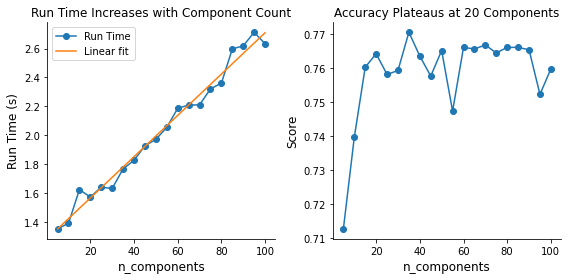

In [30]:
# First, the run time is fitted to a line as a function of the number of dimensions.
# The only data I will be using from this fit is the slope and intercept (the first two terms).
m_t, b_t, r, p, std_err = stats.linregress(n_comp, times)

# A multipanel plot is instantiated.
plt.subplots(2, figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(n_comp, times, marker='o', label='Run Time')
plt.plot(n_comp, m_t * n_comp + b_t, label='Linear fit')
plt.xlabel('n_components', size=12)
plt.ylabel('Run Time (s)', size=12)
plt.legend()
plt.title('Run Time Increases with Component Count', size=12)

plt.subplot(1,2,2)
plt.plot(n_comp, scores, marker='o')
plt.xlabel('n_components', size=12)
plt.ylabel('Score', size=12)
plt.title('Accuracy Plateaus at 20 Components', size=12)

plt.tight_layout()
sns.despine()
plt.show()

The run time appears to have a fairly linear correlation with the number of dimensions (or components) generated by the PCA model. Therefore, it can be concluded that the run time can be reduced by reducing the number of dimensions in our analyses. The accuracy of our model does is lowest with only 5 dimensions (~71% accuracy). This score increases to just under 77% with 15 dimensions. Significant improvement is not observed beyond 15 dimensions. Thus, PCA dimensional reduction can be used to reduce run time and slightly improve the accuracy of the model (original accuracy without PCA = 73%) 

#### *Advantages and Disadvantage of Dimensionality Reduction*

PSA based dimensionality reduction has both advantages and disadvantages. For example, as was seen above, one benefit of dimensionality reduction is that it can improve model performance and runtime. However, one significant disadvantage is that the dimensions obtained from PCA are not usually very easy to interpret in a real world setting. 

### *K-Nearest Neighbour classifier*

#### *Initial Model Fitting*

The hotel review data will now be fit with a K-Nearest Neighbor (KNN) classifier. The results of this fit will then be refined and compared to the results obtained with logistic regression.

In [13]:
# Instantiation of the KNN classifier
knn = KNeighborsClassifier()

# Fitting of the model to the train data
knn.fit(X_train, y_train)

# Scoring the model
knn.score(X_test, y_test)

0.6482306069838294

This model resulted in an accuracy of 64.8%, which is significantly less than the 71.8% value obtained with logistic regression and the 76.8% value obtained with logistic regression and PCA.

#### *K Neighbors vs Run-Time and Model Accuracy*

In order to optimize the KNN model, a relation must be determined between the primary hyperparameter of the model (the number of nearest neighbors used) and the run time and model accuracy.

In [14]:
# First, a list of possible numbers of nearest neighbors is generated.
k_neighbors = np.arange(5,101,5)

# Second, a list is created for storing the runtimes associeted with 
# the different numbers of neighbors.
knn_times = list()

# Third, a list is created for storing model accuracies.
knn_k_scores = list()

# Each potential value of nearest neighbors is itterated upon.
for i in k_neighbors:
    
    # The start time of the calculation is stored. 
    start = time.time()
    
    # The model is instantiated with a variable number of neighbors
    knn_i = KNeighborsClassifier(n_neighbors=i)
    
    # The model is fit on the traning data.
    knn_i.fit(X_train, y_train)
    
    # The model is scored relative to the test data, 
    # and this score is appended to the scores list.
    knn_k_scores.append(knn_i.score(X_test, y_test))
    
    # The end time of the calculation is stored.
    end = time.time()
    
    # The difference between the start and end time of the function
    # is appended to the time list.
    knn_times.append(end - start)

Now that we have data on the relationship between the number of nearest neighbors used and both run time and model accuracy, these data will be plotted so that insights may be gained.

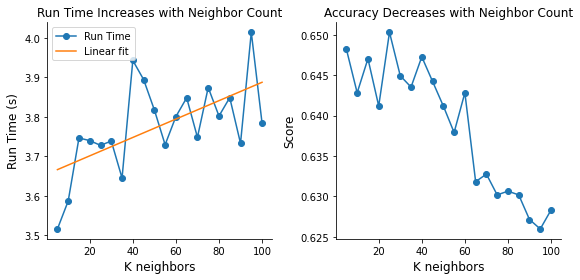

In [29]:
# The run time is fitted to a line as a function of the number of neighbors.
# Again, the only data of interest are the first two terms (the slope and intercept)
m_k, b_k, r, p, std_err = stats.linregress(k_neighbors, knn_times)

# A multipanel plot is instantiated
plt.subplots(2, figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(k_neighbors, knn_times, marker='o', label='Run Time')
plt.plot(k_neighbors, m_k*k_neighbors + b_k, label='Linear fit')
plt.xlabel('K neighbors', size=12)
plt.ylabel('Run Time (s)', size=12)
plt.legend()
plt.title('Run Time Increases with Neighbor Count', size=12)

plt.subplot(1,2,2)
plt.plot(k_neighbors, knn_k_scores, marker='o')
plt.xlabel('K neighbors', size=12)
plt.ylabel('Score', size=12)
plt.title('Accuracy Decreases with Neighbor Count', size=12)

plt.tight_layout()
sns.despine()
plt.show()

As can be seen in the plot above, the number of neighbors used in the KNN model is roughly linearly correlated with the run time of the model. Thus, the run time can be reduced by using fewer neighbors in the model. The accuracy of the model is relatively constant at around 64% to 65% When between 5 and 40 neighbors are used. Beyond this, the accuracy of the model decreases with the number of neighbors used as a result of over fitting. From these results it can be concluded that the KNN model is unlikely to outperform the logistic regression model.

#### *Advantages and Disadvantage of Reducing the Number of Neighbors*

Reducing the number of nearest neighbors used in a KNN model results in faster run times and sometimes in better model accuracy. However, reducing the number of neighbors used too far can result in under fitting the model.  

Similarly, using too few observation to train the model will result in poor model performance, but using too many observations in your train set will result in excessively long train times.

#### *Optimizing K in the KNN Model*

Now that the model has been tested and a relationship between K and runtime and performance have been established, I will use a grid search to find the optimal value for K. I will only look at odd values (to avoid ties) between 1 and 39, the range observed to be approximately invariant in the above tests.

In [16]:
# I will use a pipeline setup to expedite analysis
# I will use an estimator that first scales the data and then fits it with a KNN Model. 
estimators = [('normalise', StandardScaler()),
              ('model', KNeighborsClassifier())]

# The estimator is then fed into a pipeline
pipe = Pipeline(estimators)

# The parameters to be tested for in the grid search are established.
params = {'model__n_neighbors': np.arange(1,40,2)}

# The grid is instantiated. The data will be split into 2 sets for validation.
knn_grid = GridSearchCV(pipe, param_grid=params, cv=2)

# And, the grid is fit with the training data.
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('normalise', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

Now that the model is trained, it is important to determine the set of conditions that resulted in the best fit to the training and validation data and how this fit stacks up against the testing data.

In [17]:
# The parameters of the optimal fit are derived from the model.
print(knn_grid.best_estimator_)

# The model is scored against the test data.
knn_grid.score(X_test, y_test)

Pipeline(steps=[('normalise', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=23))])


0.6871338176704945

The best KNN model was found to have 23 neighbors, but an accuracy of only 68.7% was obtained with this model, which is still less than that obtained with the PCA and logistic regression model (76.8% accuracy).

#### *Issue with Splitting Into Train and Validation After Vectorization*

It should be noted here that the text data were vectorized here before splitting the data into train and validation sets. This is not strictly proper, as the validation and train sets are thus already dependent on one another.

### *Decision Tree Classifier*

#### *Initial Model Fitting*

The hotel review data will now be fit with a Decision Tree Classifier. The results of this fit will then be refined and compared to the results obtained with logistic regression.

In [18]:
# Instantiation of the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Fitting of the model to the train data
decision_tree.fit(X_train, y_train)

# Scoring the model
decision_tree.score(X_test, y_test)

0.701195219123506

This model resulted in an accuracy of 69.4%, which is better than the best value obtained for the KNN model (68.7%). However, this value is still significantly less than the 76.8% value obtained with logistic regression and PCA.

#### *Optimization of Decision Tree Depth*

In order to optimize the Decision Tree model, the maximum number of decision branches must be determined. This will be accomplished here using a grid search. In order to avoid over fitting and to prevent excessive run times, odd values between 1 and 51 will be considered.

In [19]:
# I will use an estimator that fits the data with a  Decision Tree Model. 
estimators_dt = [('model', DecisionTreeClassifier())]

# The estimator is then fed into a pipeline
pipe_dt = Pipeline(estimators_dt)

# The parameters to be tested for in the grid search are established.
params_dt = {'model__max_depth': np.arange(1,52,2)}

# The grid is instantiated. The data will be split into 2 sets for validation.
dt_grid = GridSearchCV(pipe_dt, param_grid=params_dt, cv=2)

# And, the grid is fit with the training data.
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51])})

Now that the model is trained, it is important to determine the set of conditions that resulted in the best fit to the training and validation data and how this fit stacks up against the testing data.

In [20]:
# The parameters of the optimal fit are derived from the model.
print(dt_grid.best_estimator_)

# The model is scored against the test data.
dt_grid.score(X_test, y_test)

Pipeline(steps=[('model', DecisionTreeClassifier(max_depth=5))])


0.7398640731192876

The best Decision Tree model was found to have a max depth of only 5. This model resulted in an accuracy of 74.0%. This value is higher than that obtained with the KNN model, but still less than that obtained with PCA and logistic regression (76.8%).

#### *Advantages and Weaknesses of Decision Trees*

There are advantages and disadvantages of using decision tree classifiers. Two advantages to decision trees are that the data does not need to be scaled and the results from a decision tree are often more easily interpreted than the results of KNN model. Two weaknesses of decision trees are that decision trees can easily over fit the data and decision trees are fairly unstable, meaning they can be dramatically affected structurally by small changes in the data.

### *The Purpose of the Validation Set*

It is always the goal of to improve our model by testing it against real data. However, we don't want any information from our test set getting back into our trained model. If this happens, we are no longer able to provide a blind accuracy score of our model. Therefore, we make an additional quasi-test set called the validation set that we can test our model against in order to make iterative improvements.

### *Logistic Regression Hyperparameter Optimization*

The logistic regression model obtained using a PCA with 15 component was found to give the best results. This model will now be optimized for the `C` value associated with the `l2` penalty.

#### *5-fold Cross Validation*

In [21]:
# I will use an estimator that first fits the data to 15 dimensions
# and then fits it with lgoistic regression model. 
estimators_5f = [('pca', PCA(n_components=15)),
                 ('model', LogisticRegression())]

# The estimator is then fed into a pipeline
pipe_5f = Pipeline(estimators_5f)

# The parameters to be tested for in the grid search are established.
# I am optimizing the C variable
params_5f = [
    {
        'model__penalty': ['l2'],
        'model__C': [0.0005, 0.00075, 0.001, 0.0025, 0.005, 0.1, 0.5, 1],
        'model__solver': ['lbfgs']
    }
]

# The grid is instantiated. The data will be split into train 
# and validation data 5 different times for testing.
grid_5f = GridSearchCV(pipe_5f, param_grid=params_5f, cv=5)

# And, the grid is fit with the training data.
grid_5f.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=15)),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [0.0005, 0.00075, 0.001, 0.0025, 0.005,
                                       0.1, 0.5, 1],
                          'model__penalty': ['l2'],
                          'model__solver': ['lbfgs']}])

Now that the model is trained, it is important to determine the set of conditions that resulted in the best fit to the training and validation data and how this fit stacks up against the testing data.

In [22]:
# The parameters of the optimal fit are derived from the model.
print(grid_5f.best_estimator_)

# The model is scored against the test data.
grid_5f.score(X_test, y_test)

Pipeline(steps=[('pca', PCA(n_components=15)),
                ('model', LogisticRegression(C=0.0025))])


0.76728380595266

For this model, an accuracy score of only 75.1% is obtained. This is less than the original 76.8% obtained with logistic regression and PCA. However, the 75.1% value is obtained with a more confidently trained model. This value is obtained with a C value of 0.001.

#### *Confusion Matrix*

In order to visualize where the model is doing well and where it is failing, a confusion matrix will be plotted.

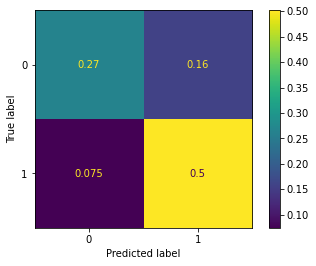

In [23]:
# Get class predictions
y_pred = grid_5f.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(grid_5f, X_test, y_test, normalize='all');

From the confusion matrix it can be seen that 27% of the reviews are being properly labeled as negative reviews, 48% are being properly labeled as positive reviews, 15% are being improperly labeled as positive reviews when they are actually negative reviews (Type I error), and 9.7% are being improperly labeled as positive reviews when they are actually negative reviews (Type II error).

### *Feature Manufacturing*

#### *A New Feature*

Now that a confident model is coming closer to fruition, some of the features included in the model can be used to manufacture new features. Here, the `month_of_review` column will be modeled into a new feature. Since the month is a cycle value that repeats every year, the `month_of_review` column will be mapped onto a circle to capture this cyclic nature. This will be done by converting the month into sine and cosine values with a period of 12 months.

In [24]:
# Create a base angle for mapping the month onto a circle
month_base_angle = 2 * math.pi / 12

# Create cosine and sine columns for the data 
# For the train data
month_cos_train = np.cos(X_train['month_of_review'] * month_base_angle)
month_sin_train = np.sin(X_train['month_of_review'] * month_base_angle)

# For the test data
month_cos_test = np.cos(X_test['month_of_review'] * month_base_angle)
month_sin_test = np.sin(X_test['month_of_review'] * month_base_angle)

# Add the sine and cosine columns to the categorical data frame
# For train data
X_train['month_cos'] = month_cos_train
X_train['month_sin'] = month_sin_train

# For test data
X_test['month_cos'] = month_cos_test
X_test['month_sin'] = month_sin_test

# Ensure that the columns were created properly
display(X_train[['month_cos', 'month_sin']].sample(5))
display(X_test[['month_cos', 'month_sin']].sample(5))

,month_cos,month_sin
10317,0.500000,-8.660254e-01
162,0.866025,-5.000000e-01
4281,-0.866025,5.000000e-01
2186,1.000000,-2.449294e-16
1964,-0.500000,8.660254e-01


,month_cos,month_sin
3711,5.000000e-01,0.866025
3146,-5.000000e-01,0.866025
1848,6.123234e-17,1.000000
1227,-5.000000e-01,-0.866025
3154,-8.660254e-01,0.500000


The `month_of_review` column has successfully been used to create cyclic representations of the month. 

#### *Re-optimize of the Best Model with the New Feature*

The newly modified data frame will now be used to try to obtain a better model.

In [25]:
# I will use an estimator that first fits the data to 15 dimensions
# and then fits it with lgoistic regression model. 
estimators_final = [('pca', PCA(n_components=15)),
                    ('model', LogisticRegression())]

# The estimator is then fed into a pipeline
pipe_final = Pipeline(estimators_final)

# The parameters to be tested for in the grid search are established.
# I am optimizing the C variable
params_final = [
    {
        'model__penalty': ['l2'],
        'model__C': [0.0005, 0.00075, 0.001, 0.0025, 0.005, 0.1, 0.5, 1],
        'model__solver': ['lbfgs']
    }
]

# The grid is instantiated. The data will be split into train 
# and validation data 5 different times for testing.
final_grid = GridSearchCV(pipe_final, param_grid=params_final, cv=5)

# And, the grid is fit with the training data.
final_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=15)),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [0.0005, 0.00075, 0.001, 0.0025, 0.005,
                                       0.1, 0.5, 1],
                          'model__penalty': ['l2'],
                          'model__solver': ['lbfgs']}])

Now that the model is trained, it is important to determine the set of conditions that resulted in the best fit to the training and validation data and how this fit stacks up against the testing data.

In [26]:
# The parameters of the optimal fit are derived from the model.
print(final_grid.best_params_)

# The model is scored against the test data.
final_grid.score(X_test, y_test)

{'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


0.7623623154441059

For this model, an accuracy score of 76.4% is obtained, which is nearly identical to the 76.8% obtained with logistic regression and PCA. This value is obtained with a C value of 0.0025.

In order to visualize where the model is doing well and where it is failing, a confusion matrix will be plotted.

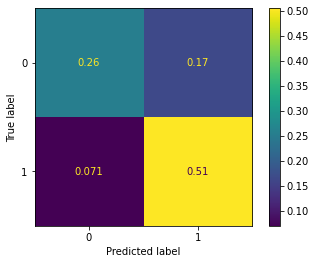

In [27]:
# Get class predictions
y_pred = final_grid.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(final_grid, X_test, y_test, normalize='all');

From the confusion matrix it can be seen that 27% of the reviews are being properly labeled as negative reviews, 50% are being properly labeled as positive reviews, 16% are being improperly labeled as positive reviews when they are actually negative reviews (Type I error), and 7.8% are being improperly labeled as positive reviews when they are actually negative reviews (Type II error). This is a slight improvement for all assignment categories relative to the previous best model except the correct negatives are still at 27%.

## Conclusion  



Logistic regression and PCA dimensional reduction were used to obtain a model resulting in a 76.4% accuracy score versus an unknown data set. This model is superior to the K nearest neighbor value of 68.7% and the decision tree value of 69.4%. Thus, the logistic regression and PCA dimensional reduction model is the best found in this investigation for modeling hotel review sentiment analysis.